<center>
    <img src="img/scikit-learn-logo.png" width="40%" />
    <br />
    <h1>Scikit-Learn机器学习包介绍</h1>

</center>

In [1]:
# 引入包和设置全局变量

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

import numpy as np
# 打印选项
np.set_printoptions(precision=3)

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# 警告
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

# 大纲

* scikit-learn和Python的数据科学生态系统
* 分类
* 模型评估和选择
* 转换器、管道和特征联合
* 总结

# Scikit-Learn

## 概述

* 用__Python__编写的机器学习库
* 对专家和非专家来说，都是简单而有效的
* 经典的机器学习算法
* 附带文档 <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* __BSD 3 license__（Berkeley Software Distribution license），是自由软件 （开源软件 的一个子集）中使用最广泛的许可证 之一。

## 社区驱动的开发
- 20〜核心开发人员（主要是研究人员）
- 500多个临时的贡献者
- 在[GitHub]（https://github.com/scikit-learn/scikit-learn）上一起公开工作_
- 重视保持**项目可维护性**
     - 风格一致性
     - 单元测试覆盖
     - 文件和例子
     - 代码审查
- 加入我们！

## Python进行数据分析的生态系统

__开放资源__ Python生态系统提供__独立，多功能和强大的科学工作环境__，包括：[NumPy]（http://numpy.org ），
[SciPy]（http://scipy.org ），
[IPython]（http ：//ipython.org），[Matplotlib]（http://matplotlib.org ），
[Pandas]（http://pandas.pydata.org/ ），
以及其他许多...


<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

- scikit- learn建立在NumPy和SciPy的基础上，并通过机器学习算法对这个科学环境进行补充;
- 通过设计，scikit- learn是非侵入性的，易于使用，易于与其他库结合;
- 核心算法是用低级语言实现的。

## 算法

__监督学习：__

* 线性模型（Ridge，Lasso，Elastic Net ...）
* 支持向量机
* 基于树的方法（Random Forest，Bagging，GBRT，...）
* 最近邻分类器
* 神经网络
* 高斯过程
* 特征选择

__非监督学习：__

* 聚类（KMeans，Ward，...）
* 矩阵分解（PCA，ICA，...）
* 密度估计
* 异常检测

__模型选择和评估：__

* 交叉验证
* 网格搜索
* 很多指标

_...以及更多！_（见我们的[参考]（http://scikit-learn.org/dev/modules/classes.html ）

# 分类



数据来自有限学习集合${\cal L} =（X，y）$其中
* 输入样本以数组 $X$ 形式给出，形状为`n_samples`  $\times$ `n_features`，其值为 ${\cal X}$;
* 输出值以数组 $y$ 的形式给出，并以 ${\cal Y}$ 中的_symbolic_值表示。

监督分类的目标是建立一个估计器 $\varphi_{\cal L}: {\cal X} \mapsto {\cal Y}$ 使其最小化下式：

$$
Err(\varphi_{\cal L}) = \mathbb{E}_{X,Y}\{ L(Y, \varphi_{\cal L}(X)) \}
$$

其中$L$ 是损失函数，例如分类为$L_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$的0-1损失。

## 应用

- 从背景事件中分类出信号;
- 从症状中诊断疾病;
- 在照片中认出猫;
- 通过Kinect摄像头识别身体部位;
- …

## 数据

- 输入数据= Numpy数组或Scipy稀疏矩阵;
- 算法是用在矩阵或向量上定义的高级操作表示的(类似于MATLAB);
- 利用高效的易用的实现;
- 保持代码简短易读。

In [2]:
# 生成数据
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=20, random_state=123)#random_state随机种子,下次随机数据不变

In [3]:
X[:10]

array([[-6.453, -8.764],
       [ 0.29 ,  0.147],
       [-5.184, -1.253],
       [-4.714,  3.674],
       [ 4.516, -2.881],
       [-0.577,  4.616],
       [ 0.42 , -7.091],
       [ 4.98 , -1.423],
       [ 4.68 , -1.258],
       [-2.16 ,  2.751]])

In [4]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
labels = ["b", "r"]
y = np.take(labels, (y < 10))  #y为1到20之间的值，y<10结果是20个[True,False，..]列表，即[1,0,..]列表
print(X) 
print(y[:5])

[[-6.453 -8.764]
 [ 0.29   0.147]
 [-5.184 -1.253]
 ...
 [-0.231 -1.608]
 [-0.603  6.873]
 [ 2.284  4.874]]
['r' 'r' 'b' 'r' 'b']


In [6]:
# X是一个二维数组，包含1000行和2列
print(X.shape)
 
# y是1000个元素的向量
print(y.shape)

(1000, 2)
(1000,)


In [7]:
# 行和列可以使用列表，切片或掩码进行访问
print(X[[1, 2, 3]])     # 第1,2和3行
print(X[:5])            # 前5行
print(X[500:510, 0])    # 在第0列的第500行到第510行的值
print(X[y == "b"][:5])  # y="b"的前5行

[[ 0.29   0.147]
 [-5.184 -1.253]
 [-4.714  3.674]]
[[-6.453 -8.764]
 [ 0.29   0.147]
 [-5.184 -1.253]
 [-4.714  3.674]
 [ 4.516 -2.881]]
[-4.438 -2.46   4.331 -7.921  1.57   0.565  4.996  4.758 -1.604  1.101]
[[-5.184 -1.253]
 [ 4.516 -2.881]
 [ 1.708  2.624]
 [-0.526  8.96 ]
 [-1.076  9.787]]


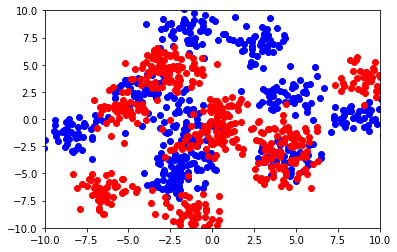

In [8]:
# 画图
plt.figure()
for label in labels:
    mask = (y == label) #先取标记"b",再取标记"r" 的y值，构造掩码mask
    plt.scatter(X[mask, 0], X[mask, 1], c=label) #分别用与上面对应的X数据绘图
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [9]:
import sklearn

In [10]:
sklearn.datasets.fetch_

AttributeError: module 'sklearn.datasets' has no attribute 'fetch_'

## 一个简单而统一的API


scikit-learn中的所有学习算法共享一个统一且有限的由互补接口组成的API：

- 用于建立和拟合模型的“估算器”界面;
- 用于进行预测的“预测器”界面;
- 用于转换数据的“转换器”接口。

目标：强制执行一个简单而一致的API来使**交换或插入**算法变得非常容易。

### 估算器（Estimator）

In [11]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        #设置状态 ``self``
        
        
        
        return self

In [12]:
# 导入最近邻分类器，构造一个估算器（Estimator）
from sklearn.neighbors import KNeighborsClassifier  # 改变这个尝试 
                                                    # 其他

# 设置超参数，用于控制算法
clf = KNeighborsClassifier(n_neighbors=5)

# 从训练数据中学习模型
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# 估算器状态被存储在实例属性中
clf._tree

### 预测器

In [14]:
# 进行预测 
print(clf.predict(X[:5])) 

['r' 'r' 'r' 'b' 'b']


In [15]:
# 计算（近似）类概率
print(clf.predict_proba(X[:5]))

[[0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]]


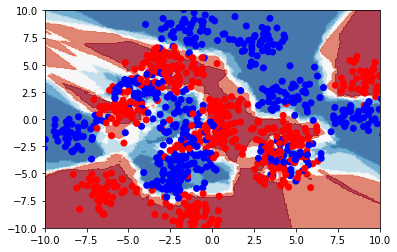

In [16]:
#绘制决策边界
from tutorial import plot_surface    
plot_surface(clf, X, y)

## Classifier zoo

### 决策树

Idea：用贪心算法，使用与特征轴正交的切割，建立输入空间的一个分区。<br>
该类算法在每个阶段，都作出一个看上去最优的决策（在一定的标准下）。决策一旦作出，就不可再更改。

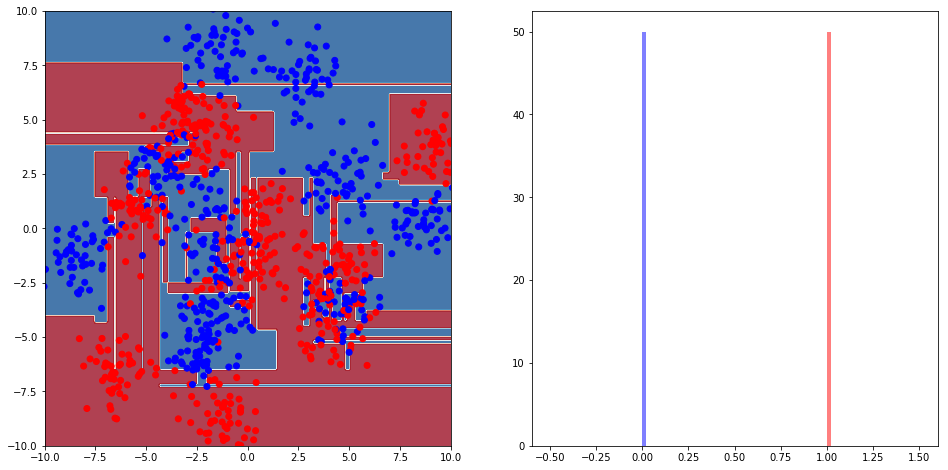

In [17]:
from tutorial import plot_clf
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()#默认基于基尼指标
clf.fit(X, y)
plot_clf(clf, X, y)

### 随机森林

Idea：用受控的随机性构建几个决策树并平均他们的决策。

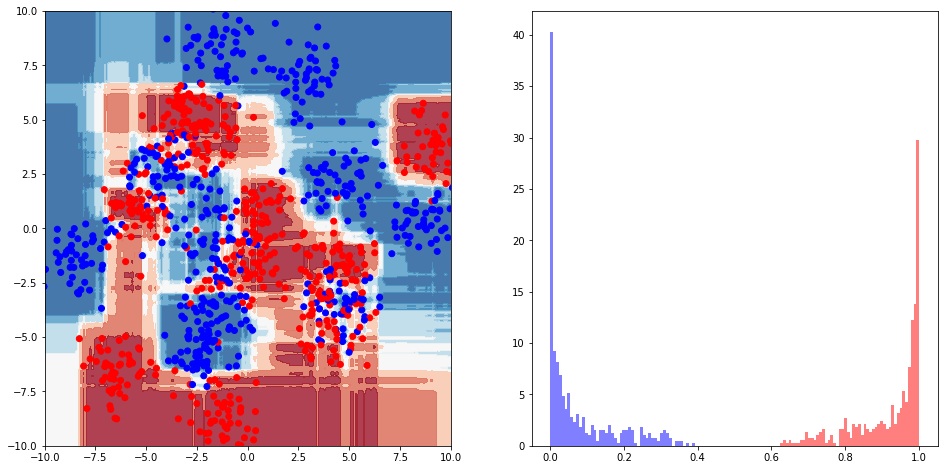

In [18]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
# from sklearn.ensemble import ExtraTreesClassifier 
# clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

### 支持向量机

Idea:找到距离训练点最近的最大超平面。

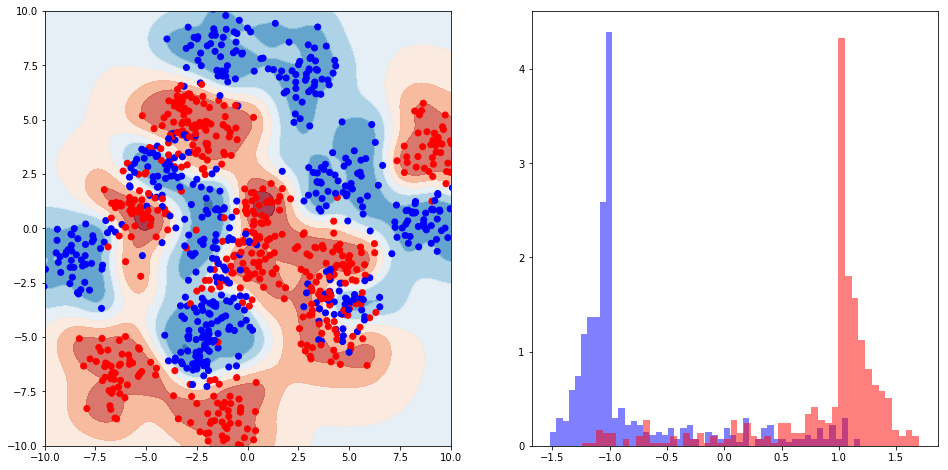

In [19]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")  # 尝试替换kernel="rbf" 
clf.fit(X, y)
plot_clf(clf, X, y)

### 多层感知器

Idea:多层感知器是数据的非线性组合连接。

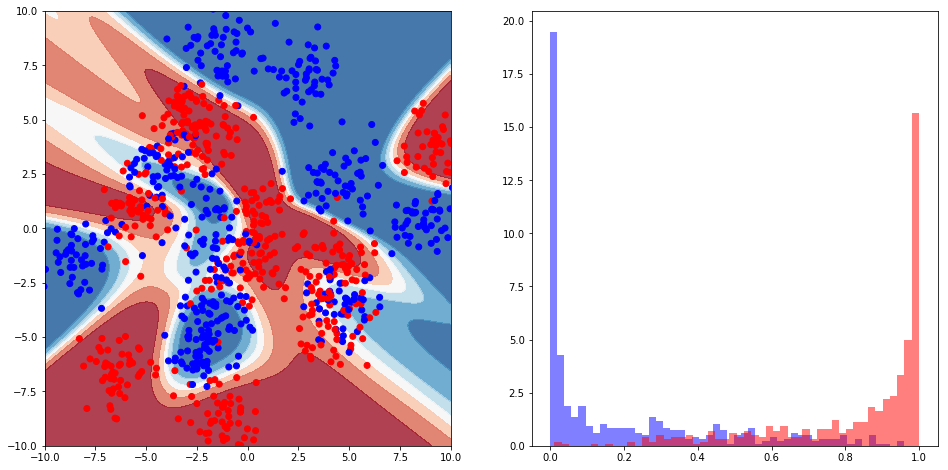

In [20]:
# Only scikit-learn 0.18
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="tanh", learning_rate="invscaling")
clf.fit(X, y)
plot_clf(clf, X, y)

# 模型评估和选择

## 评估

- 回想一下，我们想要学习一个估计器$\varphi_{\cal L}$以最大限度减少化泛化错误$Err(\varphi_{\cal L}) = \mathbb{E}_{X,Y}\{ L(Y, \varphi_{\cal L}(X)) \}$。

- 问题：由于 $P_{X,Y}$是未知的，泛化错误 $Err(\varphi_{\cal L})$ 不能被评估。

- 解决方案：使用代理（例如测试集）近似求解 $Err(\varphi_{\cal L})$。

## 训练误差

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss  #只记判断对错
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.0


## 测试误差

问题:训练误差是对泛化误差的一个有偏见的估计。

解决方案:将$ {\cal L} $分为两部分，称为训练和测试集(通常使用70%用于训练，30%用于测试)。
- 使用训练集拟合模型;
- 只使用测试集进行评估，从而产生无偏估计。

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.10399999999999998
Test error = 0.16000000000000003


总结:当你评估模型的表现时，要注意偏差:
- 训练分数通常是对真实表现的乐观估计;
- ** 同样的数据不应该同时用于训练和评估。**

## 交叉验证

问题：
- 当${\cal L}$ 很小时，对70％的数据进行训练可能会导致一个模型与在整个集合${\cal L}$ 上学习的模型存在显著差异。
- 然而，增加训练集的大小（或者减小测试集的大小）可能导致对泛化误差的不准确估计。

解决方案:K-Fold交叉验证。
- 将${\cal L}$ 拆分成K个小的不相交的模块。
- 在k - 1个模块上进行训练，对测试错误进行评估。
- 重复所有组合，并平均K估计泛化误差。


<center>![](img/cross-validation.png)</center>

In [31]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(zero_one_loss(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.163000 +-0.010770


## 评估指标

### 默认评分

估计器附带一个内置的默认评估分数
* 分类的准确性
*  R2回归分数

In [32]:
y_train = (y_train == "r")
y_test = (y_test == "r")
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

Default score = 0.84


### 准确性

定义:准确性是正确预测的比例。

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.84


### 精确度, 召回率 and F值

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

Precision = 0.8118811881188119
Recall = 0.8631578947368421
F = 0.8367346938775511


### ROC AUC

定义： false positive rate（FPR，假阳率）与 true positive rate（TPR，真阳率）<br>
受试者工作特征曲线 （receiver operating characteristic curve，简称ROC曲线），又称为感受性曲线（sensitivity curve）。ROC曲线是根据一系列不同的二分类方式（分界值或决定阈），以真阳性率（灵敏度）为纵坐标，假阳性率（1-特异度）为横坐标绘制的曲线。<br>
ROC曲线越靠近左上角,试验的准确性就越高。最靠近左上角的ROC曲线的点是错误最少的最好阈值，其假阳性和假阴性的总数最少。亦可通过分别计算各个试验的ROC曲线下的面积(AUC)进行比较，哪一种试验的 AUC最大，则哪一种试验的诊断价值最佳。

ROC AUC = 0.9297744360902256


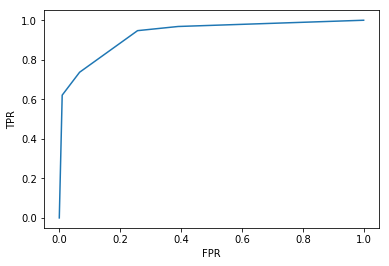

In [39]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer("roc_auc")
print("ROC AUC =", roc_auc_scorer(clf, X_test, y_test))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()#图形越偏向左上角越好

### 混淆矩阵

定义：类$i$的样本数预测为类$j$。

行为真实值，列为预测值。

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[86, 19],
       [13, 82]])

## 模型选择
 
- 找到良好的超参数对于控制过度拟合是至关重要的，从而获得更好的性能。
- 估计泛化误差可用于选择最佳模型。

## 拟合不足(欠拟合)和过度拟合(过拟合)
- 拟合不足:模型过于简单，无法捕捉X和Y之间的真实关系。
- 过度拟合:模型过于适合训练集，没有泛化能力

## 超参数搜索

In [41]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": list(range(1, 100))},
                    scoring="accuracy",
                    cv=5, n_jobs=-1)
grid.fit(X, y)  # Note that GridSearchCV is itself an estimator

print("Best score = %f, Best parameters = %s" % (1. - grid.best_score_, 
                                                 grid.best_params_))

ModuleNotFoundError: No module named 'sklearn.grid_search'

## 转换器、管道和特征联合

### Transformers（转换器）

- 分类(或回归)往往只是漫长而复杂的过程中的一步或最后一步;
- 在大多数情况下，输入数据再被送入学习算法之前，需要被清洗、管理或扩展；
- 为此，scikit- learn提供了“transformer”API。   #one-hot

In [42]:
class Transformer(object):    
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self
    
    def transform(self, X):
        """Transform X into Xt."""
        # transform X in some way to produce Xt
        return Xt
    
    # Shortcut
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        Xt = self.transform(X)
        return Xt

## Transformer zoo

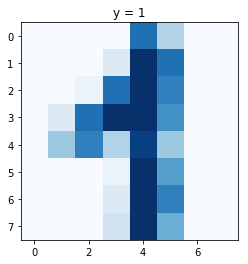

In [43]:
# 加载digits数据集
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 画图
sample_id = 42
plt.imshow(X[sample_id].reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.title("y = %d" % y[sample_id])
plt.show()

### Scalers and other normalizers（定标器和其他标准器）

In [44]:
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X_train)  
print("Mean (before scaling) =", np.mean(X_train))
print("Mean (after scaling) =", np.mean(Xt_train))

# 截图: Xt = tf.fit_transform(X)
# 参见Binarizer, MinMaxScaler, Normalizer, ...

Mean (before scaling) = 4.8921213808463255
Mean (after scaling) = -2.307813265739004e-18


In [45]:
# 对于某些算法来说Scaling是至关重要的
from sklearn.svm import SVC
clf = SVC()
print("Without scaling =", clf.fit(X_train, y_train).score(X_test, y_test))
print("With scaling =", clf.fit(tf.transform(X_train), y_train).score(tf.transform(X_test), y_test))

Without scaling = 0.4866666666666667
With scaling = 0.9844444444444445


### 特征选择

Shape = (1347, 10)


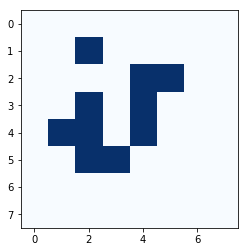

In [46]:
# 选择前10个特征，如使用ANOVA f - score排名
from sklearn.feature_selection import SelectKBest, f_classif
tf = SelectKBest(score_func=f_classif, k=10)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# 画图
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

### 特征选择（续）

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

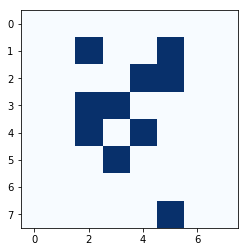

In [47]:
# 使用backward elimination（反向消除）进行特征选择
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
tf = RFE(RandomForestClassifier(), n_features_to_select=10, verbose=1)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# 画图
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

### Decomposition, factorization or embeddings（分解，因式分解或嵌入）

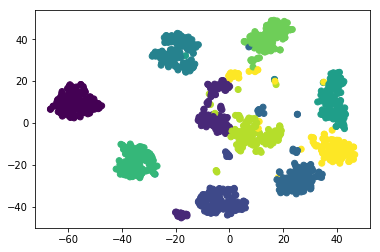

In [48]:
# 计算分解
from sklearn.decomposition import PCA  #主成分分析
from sklearn.manifold import TSNE      #t-distributed stochastic neighbor embedding
tf = TSNE(n_components=2)
Xt_train = tf.fit_transform(X_train)

# 画图
plt.scatter(Xt_train[:, 0], Xt_train[:, 1], c=y_train)
plt.show()

# 参见: KernelPCA, NMF, FastICA, Kernel approximations, 
#           manifold learning, etc

## Pipelines（管道）
转换器可以按顺序连接起来形成管道。

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# 用链转换器建立一个新的转换器
tf = make_pipeline(StandardScaler(), 
                   SelectKBest(score_func=f_classif, k=10))
tf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x1a19865510>))])

In [50]:
Xt_train = tf.transform(X_train)
print("Mean =", np.mean(Xt_train))
print("Shape =", Xt_train.shape)

Mean = -1.3715004550677509e-17
Shape = (1347, 10)


In [51]:
# 链转换器 + 分类器建立一个新的分类器
clf = make_pipeline(StandardScaler(), 
                    SelectKBest(score_func=f_classif, k=10), 
                    RandomForestClassifier())
clf.fit(X_train, y_train)
print(clf.predict_proba(X_test)[:5])

[[0.  0.  0.9 0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.9 0. ]
 [0.  0.1 0.9 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.9 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]]


In [39]:
# 可以使用步骤名称访问超参数
print("K =", clf.get_params()["selectkbest__k"])

K = 10


In [40]:
clf.named_steps

{'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'selectkbest': SelectKBest(k=10, score_func=<function f_classif at 0x000001F0A9C66D90>),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, 
                    param_grid={"selectkbest__k": [1, 10, 20, 30, 40, 50],
                                "randomforestclassifier__max_features": [0.1, 0.25, 0.5]})
grid.fit(X_train, y_train)

print("Best params =", grid.best_params_)

Best params = {'selectkbest__k': 40, 'randomforestclassifier__max_features': 0.25}


## Feature unions（特征联合）


同样地，转换器可以并行应用于连接数据的转换

## Nested composition（嵌套组合）

由于管道和连接本身就是评估器，所以它们可以被组合成嵌套的结构。

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_union

clf = make_pipeline(
    # 建立特征
    make_union(
        FunctionTransformer(func=lambda X: X), # Identity
        PCA(),
    ), 
    # 选择最好特征
    RFE(RandomForestClassifier(), n_features_to_select=10),
    # 训练
    MLPClassifier()
)

clf.fit(X_train, y_train)

Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x0000023167DFC158>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=True)), ('pca', PCA(c...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

# 总结

- Scikit-Learn为机器学习提供必要的工具。
- 它不仅仅是训练分类器！
- 它集成在一个更大的Python科学生态系统中。
- 自己尝试吧！

## 问题？